In [1]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from cartopy import config
import cartopy
import cartopy.crs as ccrs

In [2]:
files = sorted(glob.glob('/g/data/e14/cp3790/Charuni/MHW-sev/mhw_severity.pc90.*.nc'))

mhw = xr.open_mfdataset(files, combine='by_coords')

d_mar = mhw.sel(time=slice('1982-01-01', '2018-12-31'), lon=slice(90, 180), lat=slice(-60, 0))

In [9]:
d_terr = xr.open_dataset('/g/data/e14/cp3790/Charuni/ERA5-new/thw_ocean_masked.nc')

In [10]:
def overlay_plot(n): # n is the timestep 
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN, zorder=100, facecolor='none')
    ax.set_extent([90, 180, -60, 0],crs=ccrs.PlateCarree())
    #ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
    #ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

    #ax.set_extent([110, 160, -25, -5],crs=ccrs.PlateCarree())
    #ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
    #ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())
    
    #ax.stock_img()
    
    ploteo=d_mar.isel(time=n).severity.plot(
    cmap=plt.cm.get_cmap('afmhot_r', 5), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples

    vmin=0, vmax=5, # Minimum and maximum values of the colormap
    cbar_kwargs={
            'extend':'both',    # Turn on little triangles at the upper and lower end of the colorbar
            'ticks':[0, 1, 2, 3, 4, 5]   # List of ticks
    })
    ploteo.colorbar.ax.set_ylabel('mhw severity',fontsize=20)
    
    ploteo2=d_terr.isel(time=n).severity.plot(
    cmap=plt.cm.get_cmap('cubehelix_r', 5), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples
  
    vmin=0, vmax=5, # Minimum and maximum values of the colormap
    cbar_kwargs={
            'extend':'both',    # Turn on little triangles at the upper and lower end of the colorbar
            'ticks':[0, 1, 2, 3, 4, 5]   # List of ticks
    })
    ploteo2.colorbar.ax.set_ylabel('thw severity',fontsize=20)
    
    
    ax.coastlines()
    plt.xlabel('Longitude',fontsize=16)
    plt.ylabel('Latitude', fontsize=16)
    plt.title('time=%s'%str(d_terr.time[n])[36:46], fontsize=24)
    
    #plt.savefig(f"/g/data/e14/cp3790/Charuni/ERA5-new/test{n}.png")

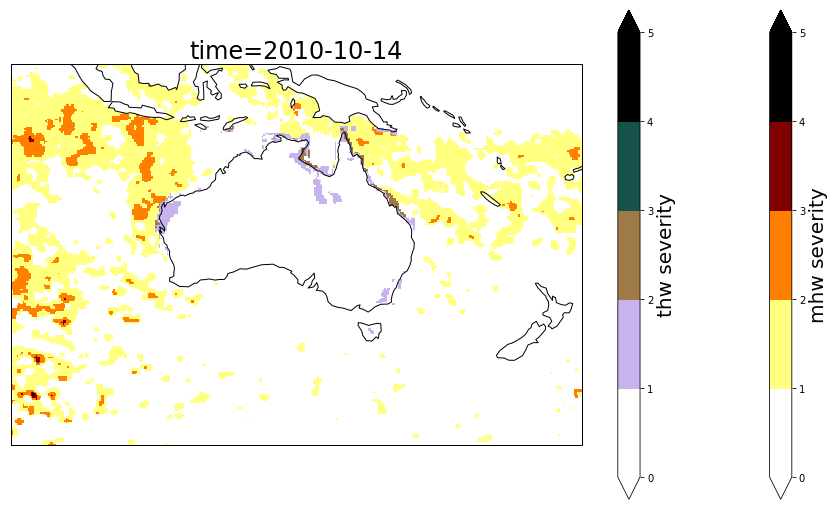

In [11]:
overlay_plot(10513)

thw_masked_ocean.nc was created in the following manner -

cdo sellonlatbox,113,154,-44,-10 static_era5.nc static_era5_aus.nc

ncks -x -v z static_era5_aus.nc static_era5_aus_lsm.nc

cdo -f nc ifthen static_era5_aus_lsm.nc filtered_severity_final.nc thw_masked_ocean.nc

In [12]:
d_terr = xr.open_dataset('/g/data/e14/cp3790/Charuni/ERA5-new/test_aus.nc')

In [13]:
def overlay_plot(n): # n is the timestep 
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN, zorder=100, facecolor='none')
    ax.set_extent([90, 180, -60, 0],crs=ccrs.PlateCarree())
    #ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
    #ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())
    
    #ax.set_extent([110, 160, -25, -5],crs=ccrs.PlateCarree())
    #ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
    #ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())
    
    #ax.stock_img()
    
    ploteo=d_mar.isel(time=n).severity.plot(
    cmap=plt.cm.get_cmap('afmhot_r', 5), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples

    vmin=0, vmax=5, # Minimum and maximum values of the colormap
    cbar_kwargs={
            'extend':'both',    # Turn on little triangles at the upper and lower end of the colorbar
            'ticks':[0, 1, 2, 3, 4, 5]   # List of ticks
    })
    ploteo.colorbar.ax.set_ylabel('mhw severity',fontsize=20)
    
    ploteo2=d_terr.isel(time=n).severity.plot(
    cmap=plt.cm.get_cmap('cubehelix_r', 5), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples
  
    vmin=0, vmax=5, # Minimum and maximum values of the colormap
    cbar_kwargs={
            'extend':'both',    # Turn on little triangles at the upper and lower end of the colorbar
            'ticks':[0, 1, 2, 3, 4, 5]   # List of ticks
    })
    ploteo2.colorbar.ax.set_ylabel('thw severity',fontsize=20)
    
    
    ax.coastlines()
    plt.xlabel('Longitude',fontsize=16)
    plt.ylabel('Latitude', fontsize=16)
    plt.title('time=%s'%str(d_terr.time[n])[36:46], fontsize=24)
    
    #plt.savefig(f"/g/data/e14/cp3790/Charuni/ERA5-new/test{n}.png")

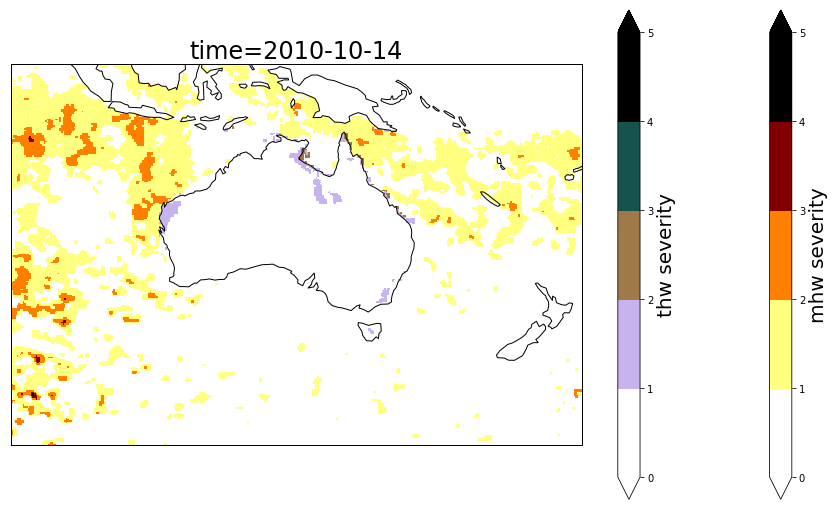

In [14]:
overlay_plot(10513)

test_aus.nc was created in the following manner -

cdo -f nc -setrtomiss,-20000,0 -topo topo_land.nc

cdo -f nc -remapcon,test_2018.nc topo_land.nc topo_land_grid_A.nc

cdo sellonlatbox,113,154,-44,-10 topo_land_grid_A.nc aus.nc

cdo -f nc ifthen aus.nc filtered_severity_final.nc test_aus.nc
